In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
def squared_l2norm(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
        param: X (m, n)
            m: number of samples in the dataset
            n: number of features of a given sample
        param: centroids (k, n)
            k: number of centroids
            n: number of features for a given centroid
    """
    M, N = X.shape
    K = centroids.shape[0]

    distances = np.zeros((M, K))

    for i in range(M):
        for k in range(K):
            distances[i][k] = np.sum([(X[i][j] - centroids[k][j]) ** 2 for j in range(N)])
            
    return distances

In [3]:
X, y = make_blobs(100, n_features=2, random_state=0)[:2]

print(X.shape)
print(y.shape)

(100, 2)
(100,)


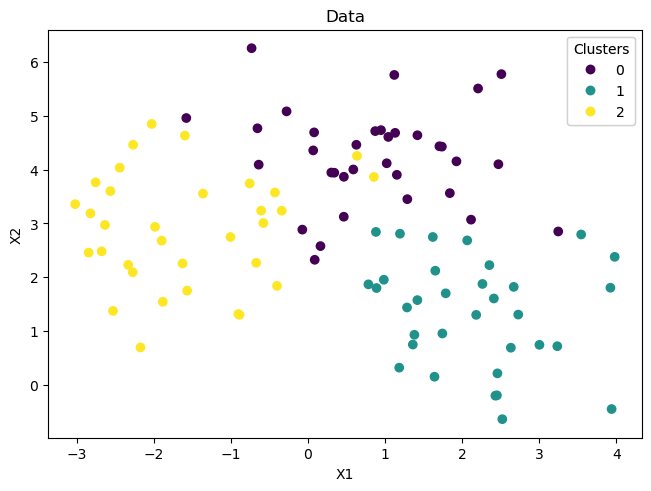

In [4]:
fig, ax = plt.subplots(layout='constrained')

scatter = ax.scatter(X[:, 0], X[:, 1], c=y)

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title("Data")

plt.show()

In [5]:
def pick_centroids(X: np.ndarray, num_clusters: int, rng: np.random.Generator) -> np.ndarray:
    idx = rng.permutation(X.shape[0])
    return X[idx[:num_clusters]]

In [6]:
num_clusters = 3
rng = np.random.default_rng(seed=0)

centroids = pick_centroids(X, num_clusters, rng)
centroids

array([[ 1.78726415,  1.70012006],
       [ 0.87305123,  4.71438583],
       [-2.17052242,  0.69447911]])

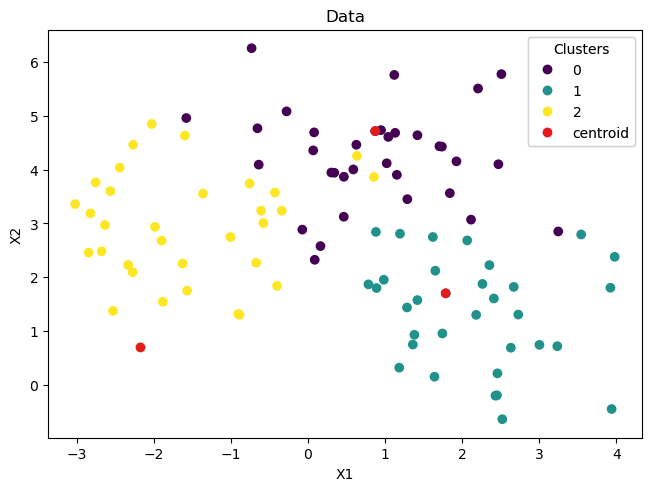

In [7]:
fig, ax = plt.subplots(layout='constrained')

scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
scatter_centroids = ax.scatter(centroids[:, 0], centroids[:, 1], c=np.ones(centroids.shape[0]), cmap='Set1')

paths, labels = scatter.legend_elements()
paths.extend(scatter_centroids.legend_elements()[0])
labels.append("centroid")

legend1 = ax.legend(paths, labels, title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title("Data")

plt.show()

In [8]:
distances = squared_l2norm(X, centroids)
print(distances.shape)

(100, 3)


In [9]:
def find_best_cluster_idx(dist: np.ndarray) -> np.ndarray:
    return np.argmin(dist, axis=1)

In [10]:
c_idx = find_best_cluster_idx(distances)

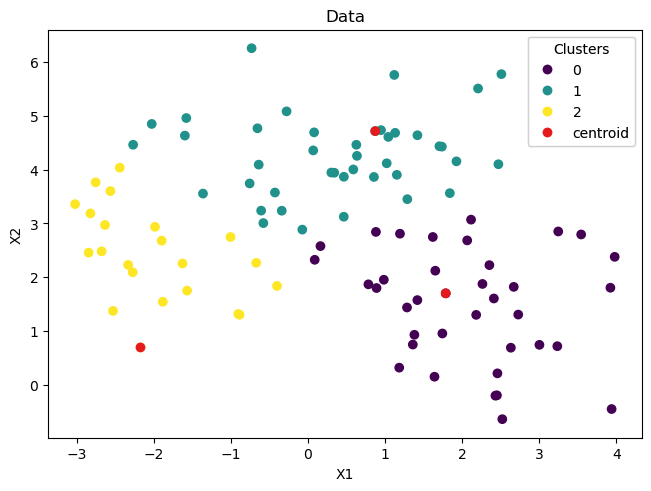

In [11]:
fig, ax = plt.subplots(layout='constrained')

scatter = ax.scatter(X[:, 0], X[:, 1], c=c_idx)
scatter_centroids = ax.scatter(centroids[:, 0], centroids[:, 1], c=np.ones(centroids.shape[0]), cmap='Set1')

paths, labels = scatter.legend_elements()
paths.extend(scatter_centroids.legend_elements()[0])
labels.append("centroid")

legend1 = ax.legend(paths, labels, title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title("Data")

plt.show()

In [12]:
def update_centroids(X: np.ndarray, c_idx: np.ndarray, num_clusters: int) -> np.ndarray:
    centroids = []
    for k in range(num_clusters):
        centroid = np.average(X[c_idx == k], axis=0)
        centroids.append(centroid)

    return np.array(centroids)

In [13]:
new_centroids = update_centroids(X, c_idx, num_clusters)

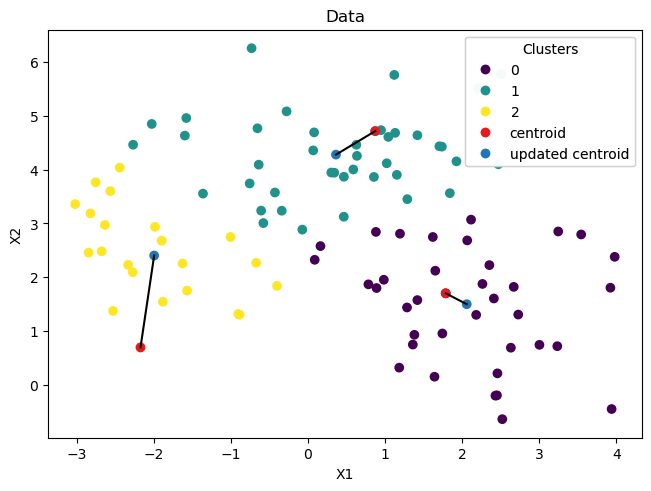

In [14]:
fig, ax = plt.subplots(layout='constrained')

scatter = ax.scatter(X[:, 0], X[:, 1], c=c_idx)
scatter_centroids = ax.scatter(centroids[:, 0], centroids[:, 1], c=np.ones(centroids.shape[0]), cmap='Set1')
scatter_new_centroids = ax.scatter(new_centroids[:, 0], new_centroids[:, 1], c=np.ones(new_centroids.shape[0]), cmap='tab10')
for k in range(num_clusters):
    ax.plot((centroids[k, 0], new_centroids[k, 0]), (centroids[k, 1], new_centroids[k, 1]), color='k')

paths, labels = scatter.legend_elements()
paths.extend(scatter_centroids.legend_elements()[0])
labels.append("centroid")

paths.extend(scatter_new_centroids.legend_elements()[0])
labels.append("updated centroid")

legend1 = ax.legend(paths, labels, title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title("Data")

plt.show()

In [15]:
def assign_centroids(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    distances = squared_l2norm(X, centroids)
    return find_best_cluster_idx(distances)


def k_means(X: np.ndarray, num_clusters: int, iters: int, eps: float = 1e-8, rng: np.random.Generator = np.random.default_rng()) -> np.ndarray:
    centroids = pick_centroids(X, num_clusters, rng)
    for _ in range(iters):
        centroid_idx = assign_centroids(X, centroids)
        new_centroids = update_centroids(X, centroid_idx, num_clusters)

        # has converged if the l2norm ^ 2 is <= than eps
        has_converged = np.all(np.sum(np.subtract(new_centroids, centroids) ** 2, axis=1) <= eps)
        if has_converged: break

        centroids = new_centroids
    
    return centroids


In [16]:
rng = np.random.default_rng(seed=0)
centroids = k_means(X, 3, iters=10, rng=rng)
final_idx = assign_centroids(X, centroids)

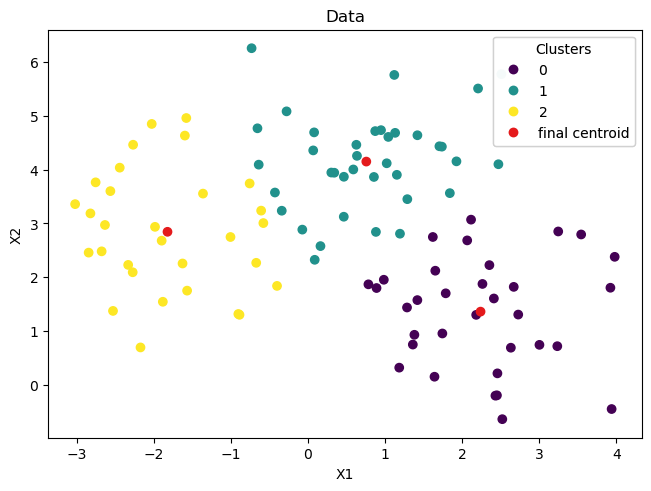

In [17]:
fig, ax = plt.subplots(layout='constrained')

scatter = ax.scatter(X[:, 0], X[:, 1], c=final_idx)
scatter_final_centroids = ax.scatter(centroids[:, 0], centroids[:, 1], c=np.ones(centroids.shape[0]), cmap='Set1')

paths, labels = scatter.legend_elements()
paths.extend(scatter_final_centroids.legend_elements()[0])
labels.append("final centroid")

legend1 = ax.legend(paths, labels, title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title("Data")

plt.show()

In [18]:
def cost(X: np.ndarray, centroids: np.ndarray) -> np.floating:
    c_idx = assign_centroids(X, centroids)
    return np.average(np.sum((X - centroids[c_idx]) ** 2, axis=1))
    

def random_initialization(
    X: np.ndarray,
    num_clusters: int,
    iters: int,
    num_tries: int,
    eps: float=1e-8,
    rng_seed: int | None = None
) -> np.ndarray:
    rng = np.random.default_rng(rng_seed)
    best_centroids = np.zeros((num_clusters, X.shape[1]))
    best_cost = np.inf

    for i in range(num_tries):
        centroids = k_means(X, num_clusters, iters, eps, rng)
        new_cost = cost(X, centroids)
        if i % (num_tries / 10) == 0:
            print(f"try: [{i}], cost: {new_cost}, best_cost: {best_cost}")
        if new_cost < best_cost:
            best_cost = new_cost
            best_centroids = centroids
    
    return best_centroids

In [19]:
best_centroids = random_initialization(X, num_clusters=3, iters=10, num_tries=10)
best_idx = assign_centroids(X, best_centroids)
best_centroids.shape

try: [0], cost: 1.6775875127963722, best_cost: inf
try: [1], cost: 1.6775875127963722, best_cost: 1.6775875127963722
try: [2], cost: 1.68720726119998, best_cost: 1.6775875127963722
try: [3], cost: 1.6775875127963722, best_cost: 1.6775875127963722
try: [4], cost: 1.6850611107696423, best_cost: 1.6775875127963722
try: [5], cost: 1.6775875127963722, best_cost: 1.6775875127963722
try: [6], cost: 1.686254498438551, best_cost: 1.6775875127963722
try: [7], cost: 1.68720726119998, best_cost: 1.6775875127963722
try: [8], cost: 1.68720726119998, best_cost: 1.6775875127963722
try: [9], cost: 1.6775875127963722, best_cost: 1.6775875127963722


(3, 2)

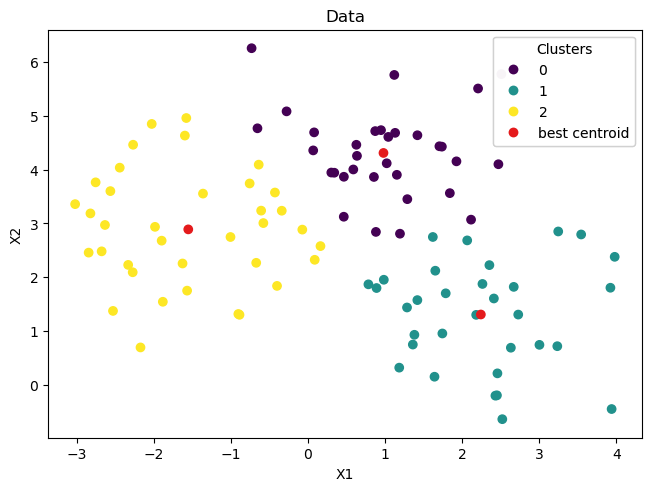

In [20]:
fig, ax = plt.subplots(layout='constrained')

scatter = ax.scatter(X[:, 0], X[:, 1], c=best_idx)
scatter_best_centroids = ax.scatter(best_centroids[:, 0], best_centroids[:, 1], c=np.ones(best_centroids.shape[0]), cmap='Set1')

paths, labels = scatter.legend_elements()
paths.extend(scatter_best_centroids.legend_elements()[0])
labels.append("best centroid")

legend1 = ax.legend(paths, labels, title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title("Data")

plt.show()